```shell
cd ~/link/res_publish/run/plot
conda activate
jupyter nbconvert plot_Mtb.ipynb --to python

conda activate publish
nohup python plot_Mtb.py True png Seurat  > /dev/null &
nohup python plot_Mtb.py True png SAMap  > /dev/null &
nohup python plot_Mtb.py True png came  > /dev/null &
nohup python plot_Mtb.py True png csMAHN  > /dev/null &

rm plot_Mtb.py

conda activate
echo 'finish'

jobs

```

In [1]:
import sys
from pathlib import Path
p_root = Path('.').absolute().parent
None if str(p_root) in sys.path else sys.path.append(str(p_root))

In [2]:
from func import *
item = 'Mtb'
fig_format = 'png'
show_legend = False

model = ''
if sys.argv[1] == 'True':
    fig_format = sys.argv[2]
    model = sys.argv[3]
assert model in 'Seurat,came,csMAHN,SAMap'.split(
    ','), '[Error] Invalid modle "{}"'.format(model)

p_plot_item = p_plot.joinpath(item)
p_plot_item.mkdir(exist_ok=True, parents=True)
df_para = pd.read_csv(p_cache.joinpath(
    'parameter_{}.csv'.format(item)
))
df_para['path_ref'] = df_para['path_ref'].apply(
    lambda x: p_cache.joinpath(x))
df_para['path_que'] = df_para['path_que'].apply(
    lambda x: p_cache.joinpath(x))
df_para

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-01 16:56:36.206757: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



,tissue,sp_ref,path_ref,name_ref,sp_simple_ref,sp_que,path_que,name_que,sp_simple_que,key_cell_type
0,Mtb,mouse,/public/workspace/licanchengup/download/res_pu...,Mtb-m-macr,m,human,/public/workspace/licanchengup/download/res_pu...,Mtb-h-macr,h,macr_cell_type
1,Mtb,mouse,/public/workspace/licanchengup/download/res_pu...,Mtb-m-macr,m,macaque,/public/workspace/licanchengup/download/res_pu...,Mtb-ma-macr,ma,macr_cell_type
2,Mtb,mouse,/public/workspace/licanchengup/download/res_pu...,Mtb-m-macr,m,macaque,/public/workspace/licanchengup/download/res_pu...,COVID-ma-macr,ma,macr_cell_type


# get res info

In [3]:
df = get_test_result_df(p_res)
df = df.query("tissue == 'Mtb'")

df['time_tag'] = df['name'].str.extract(
    ';(\\d{6}-\\d{4})$', expand=False).fillna('')
df = df[df['time_tag'].str.len() == 0]
df = df.drop(columns=['time_tag'])

_temp = df.apply(
    lambda row: '{name_que};{model}'.format(
        **row), axis=1).str.replace("-macr;", ';', regex=True)
assert _temp.is_unique, '[isnot unique]'
df.index = _temp
del _temp

df['F1-score'] = df.apply(get_res_stat,
                          key='F1-score',
                          q="dataset_type == 'que'",
                          axis=1).mul(100).round(2)
df['Accuracy'] = df.apply(
    get_res_stat,
    key='Accuracy',
    q="dataset_type == 'que'",
    axis=1).mul(100).round(2)

df


[extract]
^(?P<tissue>.+)_(?P<sp_ref>.+)-corss-(?P<sp_que>.+);(?P<model>came|csMAHN|Seurat|SAMap);(?P<name_ref>[\w-]+)-map-(?P<name_que>[[\w-]+);?(?P<resdir_tag>.+)?$


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/pandas/core/strings/accessor.py:2738: FutureWarning: Possible nested set at position 127
  regex = re.compile(pat, flags=flags)


,dir,name,tissue,sp_ref,sp_que,model,name_ref,name_que,resdir_tag,F1-score,Accuracy
Mtb-h;SAMap,/public/workspace/licanchengup/download/res_pu...,Mtb_m-corss-h;SAMap;Mtb-m-macr-map-Mtb-h-macr;...,Mtb,m,h,SAMap,Mtb-m-macr,Mtb-h-macr,is_1v1=False,0.0,0.0
Mtb-ma;Seurat,/public/workspace/licanchengup/download/res_pu...,Mtb_m-corss-ma;Seurat;Mtb-m-macr-map-Mtb-ma-ma...,Mtb,m,ma,Seurat,Mtb-m-macr,Mtb-ma-macr,is_1v1=True,0.0,0.0
COVID-ma;Seurat,/public/workspace/licanchengup/download/res_pu...,Mtb_m-corss-ma;Seurat;Mtb-m-macr-map-COVID-ma-...,Mtb,m,ma,Seurat,Mtb-m-macr,COVID-ma-macr,is_1v1=True,0.0,0.0
Mtb-ma;csMAHN,/public/workspace/licanchengup/download/res_pu...,Mtb_m-corss-ma;csMAHN;Mtb-m-macr-map-Mtb-ma-ma...,Mtb,m,ma,csMAHN,Mtb-m-macr,Mtb-ma-macr,epochs=500;is_1v1=False,0.0,0.0
Mtb-ma;came,/public/workspace/licanchengup/download/res_pu...,Mtb_m-corss-ma;came;Mtb-m-macr-map-Mtb-ma-macr...,Mtb,m,ma,came,Mtb-m-macr,Mtb-ma-macr,epochs=500;is_1v1=False,0.0,0.0
Mtb-h;came,/public/workspace/licanchengup/download/res_pu...,Mtb_m-corss-h;came;Mtb-m-macr-map-Mtb-h-macr;e...,Mtb,m,h,came,Mtb-m-macr,Mtb-h-macr,epochs=500;is_1v1=False,0.0,0.0
COVID-ma;csMAHN,/public/workspace/licanchengup/download/res_pu...,Mtb_m-corss-ma;csMAHN;Mtb-m-macr-map-COVID-ma-...,Mtb,m,ma,csMAHN,Mtb-m-macr,COVID-ma-macr,epochs=500;is_1v1=False,0.0,0.0
COVID-ma;SAMap,/public/workspace/licanchengup/download/res_pu...,Mtb_m-corss-ma;SAMap;Mtb-m-macr-map-COVID-ma-m...,Mtb,m,ma,SAMap,Mtb-m-macr,COVID-ma-macr,is_1v1=False,0.0,0.0
Mtb-h;csMAHN,/public/workspace/licanchengup/download/res_pu...,Mtb_m-corss-h;csMAHN;Mtb-m-macr-map-Mtb-h-macr...,Mtb,m,h,csMAHN,Mtb-m-macr,Mtb-h-macr,epochs=500;is_1v1=False,0.0,0.0
Mtb-ma;SAMap,/public/workspace/licanchengup/download/res_pu...,Mtb_m-corss-ma;SAMap;Mtb-m-macr-map-Mtb-ma-mac...,Mtb,m,ma,SAMap,Mtb-m-macr,Mtb-ma-macr,is_1v1=False,0.0,0.0


In [4]:
# for i, row in df.query("model == 'SAMap' & tag =='all'").iterrows():
#     print(row['name'])
#     display(pd.read_csv(row['dir'].joinpath('group_counts_unalign.csv')))
#     display(pd.read_csv(row['dir'].joinpath('group_counts.csv')))

Mtb_m-corss-ma;csMAHN;Mtb-m-macr-map-Mtb-ma-macr;epochs=500;is_1v1=False---


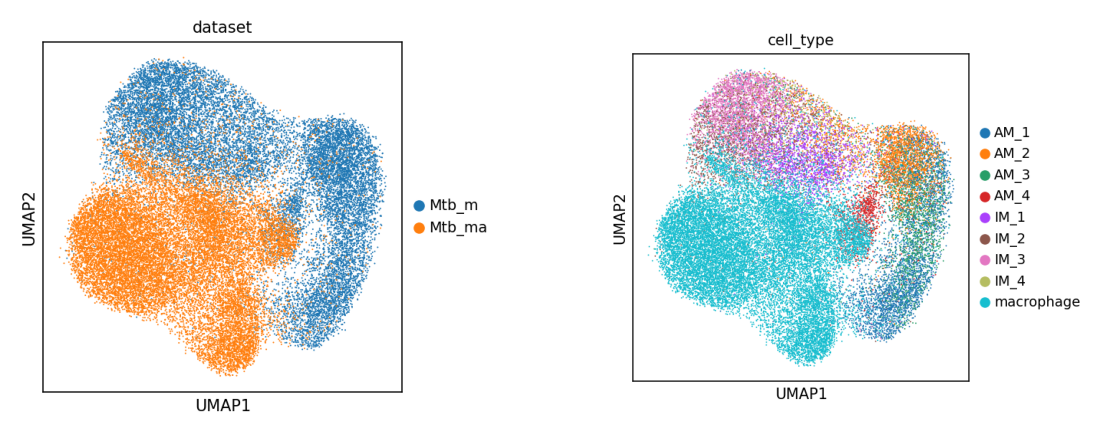

,Mtb_m,Mtb_ma
macr_cell_type,,
AM_1,3218.0,NaN
IM_3,2861.0,NaN
AM_2,2547.0,NaN
IM_2,1896.0,NaN
IM_1,1852.0,NaN
AM_3,1843.0,NaN
AM_4,967.0,NaN
IM_4,536.0,NaN
macrophage,NaN,18217.0


Mtb_m-corss-ma;csMAHN;Mtb-m-macr-map-COVID-ma-macr;epochs=500;is_1v1=False-


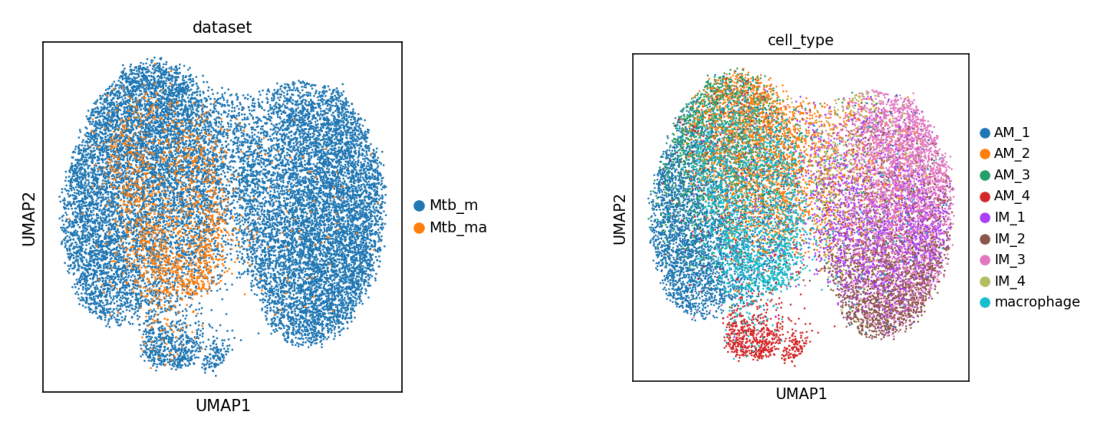

,Mtb_m,Mtb_ma
macr_cell_type,,
AM_1,3218.0,NaN
IM_3,2861.0,NaN
AM_2,2547.0,NaN
IM_2,1896.0,NaN
IM_1,1852.0,NaN
AM_3,1843.0,NaN
AM_4,967.0,NaN
IM_4,536.0,NaN
macrophage,NaN,1630.0


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [5]:
for i, row in df.query("sp_que == 'ma' and model == 'csMAHN'").iterrows():
    show_umap(row)

In [6]:
','.join(df.index.str.extract("([\\w-]+);", expand=False).unique())

'Mtb-h,Mtb-ma,COVID-ma'

# Mtb-h

## umap

,UMAP1,UMAP2,cell_type,dataset,is_right,max_prob,pre_label,true_label,dataset_type,sp
cell_name,,,,,,,,,,
Mtb_mtb;AAACCCACAGGCTATT_1,7.584464,0.349068,IM_3,Mtb_m,NaN,NaN,NaN,IM_3,ref,mouse
Mtb_mtb;AAACCCAGTCCTACGG_1,3.275475,0.605346,IM_1,Mtb_m,NaN,NaN,NaN,IM_1,ref,mouse


AI,AM_1,AM_2,AM_2_exclusive,AM_3,AM_4,AM_IM1,AM_MT,IM_1,IM_2,IM_3,IM_4
AI,AM_1,AM_2,AM_2_exclusive,AM_3,AM_4,AM_IM1,AM_MT,IM_1,IM_2,IM_3,IM_4
[out][plot] Mtb;Mtb-h;Seurat;umap;sp;mh.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-h;Seurat;umap;true_label;mh.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-h;Seurat;umap;true_label;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-h;Seurat;umap;true_label;h.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-h;Seurat;umap;pre_label;h.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb


<Axes: >

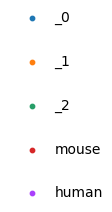

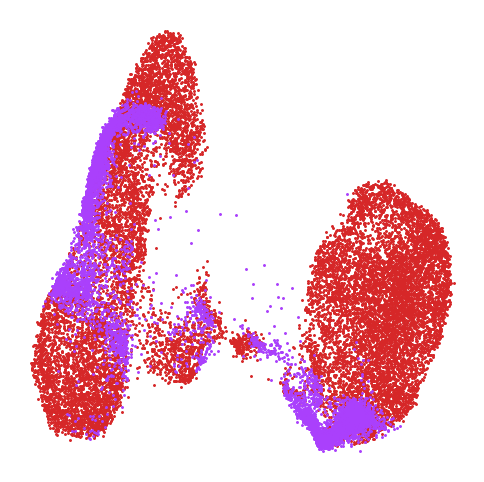

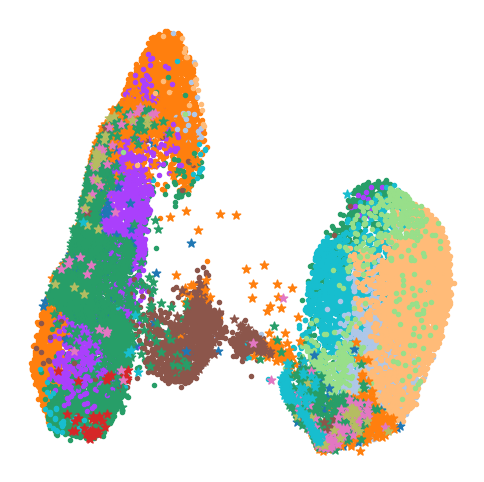

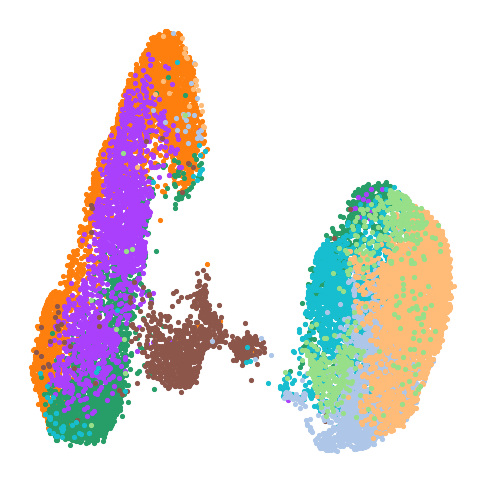

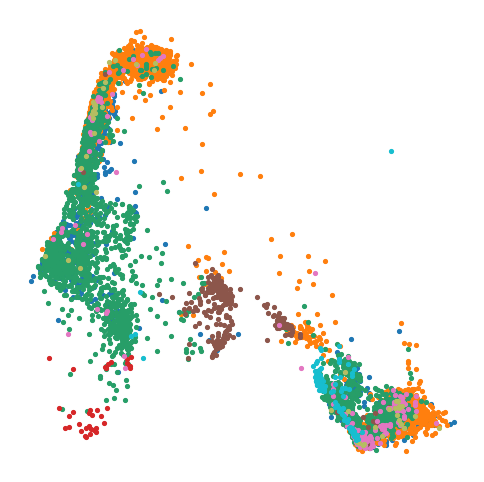

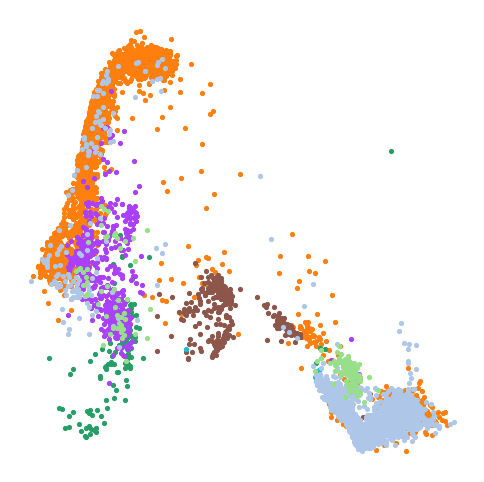

In [7]:
row = df.loc['Mtb-h;{}'.format(model), :]
df_res = get_res_obs(row)
df_res['sp'] = df_res['dataset_type'].map(
    {i: map_sp[row['sp_{}'.format(i)]] for i in 'ref,que'.split(',')})
display(df_res.head(2))
df_obs_que = pd.read_csv(row['dir'].joinpath('obs_que.csv'), index_col=0)
df_res['true_label'] = df_res['true_label'].mask(
    df_res['dataset_type'] == 'que', df_obs_que['sub_cell_type'])
df_res['cell_type'] = df_res['cell_type'].mask(
    df_res['dataset_type'] == 'que', df_obs_que['sub_cell_type'])


adata_umap = sc.AnnData(obs=df_res)
adata_umap.obsm['X_umap'] = df_res.loc[:,
                                       'UMAP1,UMAP2'.split(',')].to_numpy()
print(','.join(np.unique(adata_umap.obs['true_label'].unique())))
cell_type_color_map = get_color_map(
    "AI,AM_1,AM_2,AM_2_exclusive,AM_3,AM_4,AM_IM1,AM_MT,IM_1,IM_2,IM_3,IM_4".split(',')
)
print(','.join(cell_type_color_map.keys()))
sp_color_map = get_color_map(adata_umap.obs['sp'], offset=3)
show_color_map(sp_color_map)

# sp ref,que
save_file_name = '{};{};umap;sp;mh.{}'.format(
    item, row.name, fig_format)
ax = plot_umap(adata_umap,
               'sp',
               sp_color_map,
               size=5, marker='.',
               show_legend=show_legend,
               save_file_name=save_file_name,
               p_plot=p_plot_item
               )

# true_label ref,que
save_file_name = '{};{};umap;true_label;mh.{}'.format(
    item, row.name, fig_format)
ax = plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
               'true_label',
               cell_type_color_map,
               size=35, marker='.',
               show_legend=show_legend)

plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'true_label',
          cell_type_color_map,
          size=40, marker='*',
          show_legend=show_legend,
          ax=ax,
          save_file_name=save_file_name,
          p_plot=p_plot_item
          )

# true_label ref
save_file_name = '{};{};umap;true_label;m.{}'.format(
    item, row.name, fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
          'true_label',
          cell_type_color_map,
          size=30,
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item
          )

# true_label que
save_file_name = '{};{};umap;true_label;h.{}'.format(
    item, row.name, fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'true_label',
          cell_type_color_map,
          size=30,
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item
          )
# pre_label que
save_file_name = '{};{};umap;pre_label;h.{}'.format(
    item, row.name, fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label',
          cell_type_color_map,
          size=30,
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item
          )

[out][plot] legend;Mtb-h;cell_type.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;Mtb-h;cell_type.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;Mtb-h;cell_type.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;Mtb-h;sp.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;Mtb-h;sp.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;Mtb-h;sp.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb


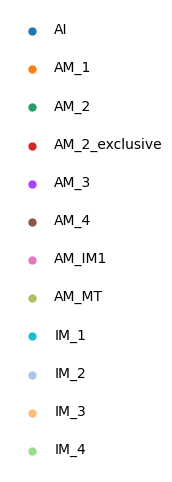

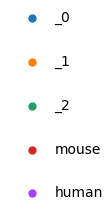

In [8]:
# [legend]
_ = 'Mtb-h'
ax = show_color_map(cell_type_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend;{};cell_type.png'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.svg'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.pdf'.format(_),p_plot=p_plot_item)

ax = show_color_map(sp_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend;{};sp.png'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};sp.svg'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};sp.pdf'.format(_),p_plot=p_plot_item)

## marker

,gn_ref,gn_que,gn_tpye,ref_exists,que_exists
20101,Top2a,TOP2A,ortholog_one2one,True,True
50824,Fcer1g,FCER1G,ortholog_one2one,True,True
53574,Cd63,CD63,ortholog_one2one,True,True
55409,Mki67,MKI67,ortholog_one2one,True,True
61286,Zeb2,ZEB2,ortholog_one2one,True,True


[out][plot] Mtb;Mtb-h;Seurat;marker;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-h;Seurat;marker;h.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb


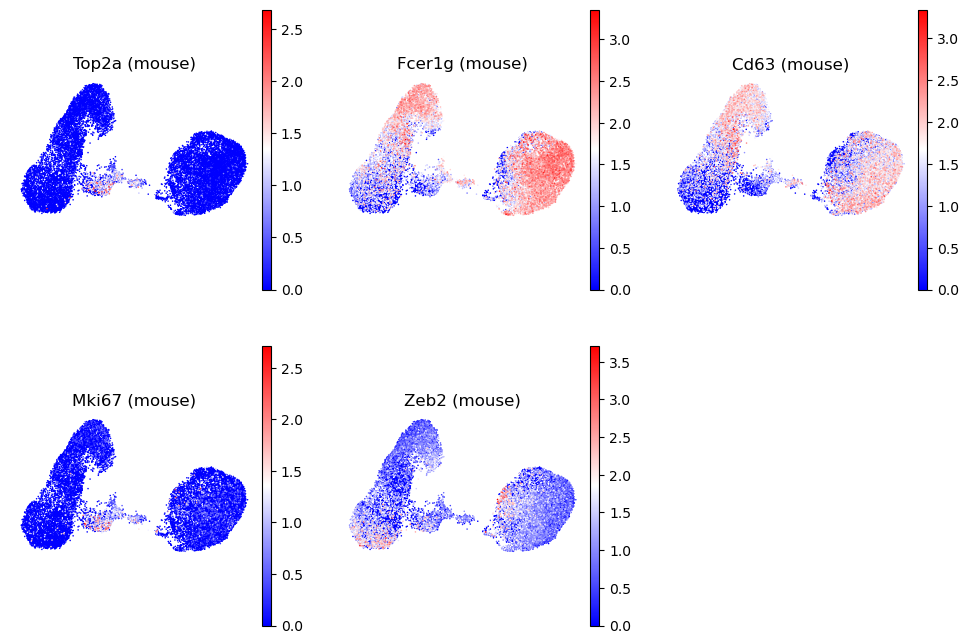

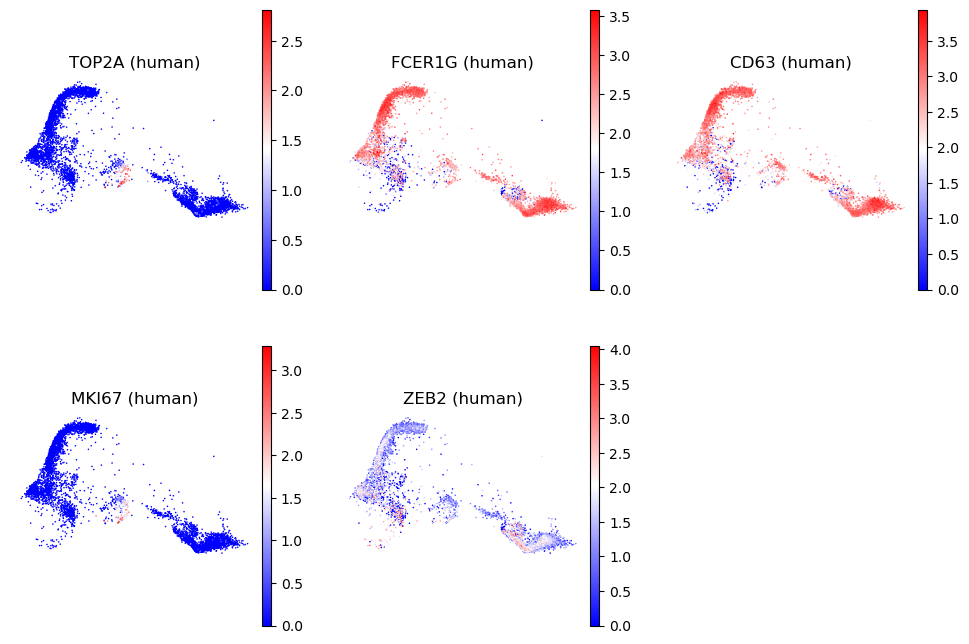

In [9]:
# load_normalized_adata
adata_ref = load_normalized_adata(
    find_path_from_para(
        df_para, row['name_ref']))
adata_que = load_normalized_adata(
    find_path_from_para(
        df_para, row['name_que']))
# load obsm['X_umap']
assert adata_que.obs.index.isin(
    df_res.query("dataset_type == 'que'").index).all()
adata_que = adata_que[df_res.query("dataset_type == 'que'").index, :]
adata_que.obs = adata_que.obs.loc[:, []].join(
    df_res.query("dataset_type == 'que'"))
adata_que.obsm['X_umap'] = df_res.query(
    "dataset_type == 'que'").loc[:, 'UMAP1,UMAP2'.split(',')].to_numpy()

assert adata_ref.obs.index.isin(
    df_res.query("dataset_type == 'ref'").index).all()
adata_ref = adata_ref[df_res.query("dataset_type == 'ref'").index, :]
adata_ref.obs = adata_ref.obs.loc[:, []].join(
    df_res.query("dataset_type == 'ref'"))
adata_ref.obsm['X_umap'] = df_res.query(
    "dataset_type == 'ref'").loc[:, 'UMAP1,UMAP2'.split(',')].to_numpy()

df_varmap = pd.read_csv(get_path_varmap(
    map_sp[row['sp_ref']], map_sp[row['sp_que']]))
df_varmap.columns = 'gn_ref,gn_que,gn_tpye'.split(',')
df_varmap = df_varmap.dropna().filter(
    regex='^gn_.+')

df_varmap_select = df_varmap[df_varmap['gn_ref'].str.match(
    '(Mki67)|(Top2a)|(Cd63)|(Fcer1g)|(Zeb2)', case=False)]
# filter IL6RA
df_varmap_select = df_varmap_select.query("gn_ref != 'IL6R'")

df_varmap_select = df_varmap_select.assign(
    **{
        'ref_exists': df_varmap_select['gn_ref'].apply(
            lambda x: x in adata_ref.var_names),
        'que_exists': df_varmap_select['gn_que'].apply(
            lambda x: x in adata_que.var_names),
    }
)
display(df_varmap_select)

nrows = 2
ncols = 3
# marker ref
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(
        4*ncols, 4*nrows),)
for ax, gene in zip_longest(np.ravel(axs), df_varmap_select.query(
        "ref_exists")['gn_ref'], fillvalue=None):
    ax.set_aspect('equal')
    if gene:
        sc.pl.umap(adata_ref, color=[gene],
                   # vmax=5,vmin=0,
                   ncols=2,
                   sort_order=True,
                   cmap='bwr',
                   size=5,
                   show=False,
                   colorbar_loc='right',
                   ax=ax,
                   frameon=False, title='{} (mouse)'.format(gene)
                   )
    else:
        fig.delaxes(ax)
savefig(fig, '{};{};marker;m.{}'.format(
    item, row.name, fig_format), p_plot=p_plot_item)
# marker que
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(
        4*ncols, 4*nrows),)
for ax, gene in zip_longest(np.ravel(axs), df_varmap_select.query(
        "que_exists")['gn_que'], fillvalue=None):
    ax.set_aspect('equal')
    if gene:
        sc.pl.umap(adata_que, color=[gene],
                   # vmax=5,vmin=0,
                   ncols=2,
                   sort_order=True,
                   cmap='bwr',
                   size=5,
                   show=False,
                   colorbar_loc='right',
                   ax=ax,
                   frameon=False, title='{} (human)'.format(gene)
                   )
    else:
        fig.delaxes(ax)
savefig(fig, '{};{};marker;h.{}'.format(
    item, row.name, fig_format), p_plot=p_plot_item)

# COVID-ma

## umap

,UMAP1,UMAP2,cell_type,dataset,is_right,max_prob,pre_label,true_label,dataset_type,sp
cell_name,,,,,,,,,,
Mtb_mtb;AAACCCACAGGCTATT_1,7.584464,0.349068,IM_3,Mtb_m,NaN,NaN,NaN,IM_3,ref,mouse
Mtb_mtb;AAACCCAGTCCTACGG_1,3.275475,0.605346,IM_1,Mtb_m,NaN,NaN,NaN,IM_1,ref,mouse


AM_1,AM_2,AM_3,AM_4,IM_1,IM_2,IM_3,IM_4,macrophage
AM_1,AM_2,AM_3,AM_4,IM_1,IM_2,IM_3,IM_4,macrophage
[out][plot] Mtb;COVID-ma;Seurat;umap;sp;mh.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;COVID-ma;Seurat;umap;true_label;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;COVID-ma;Seurat;umap;pre_label;ma.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb


<Axes: >

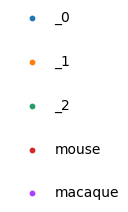

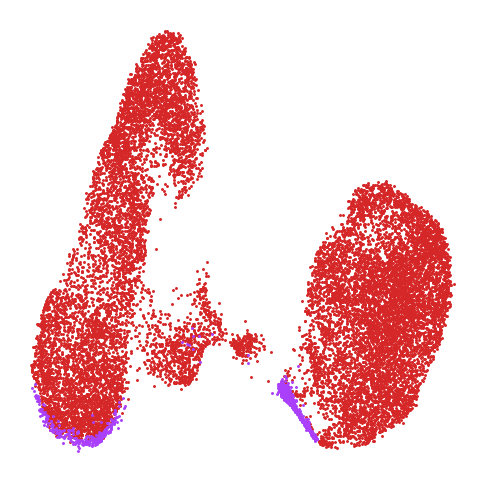

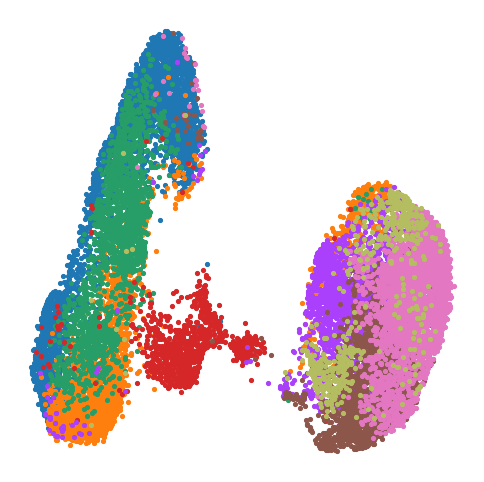

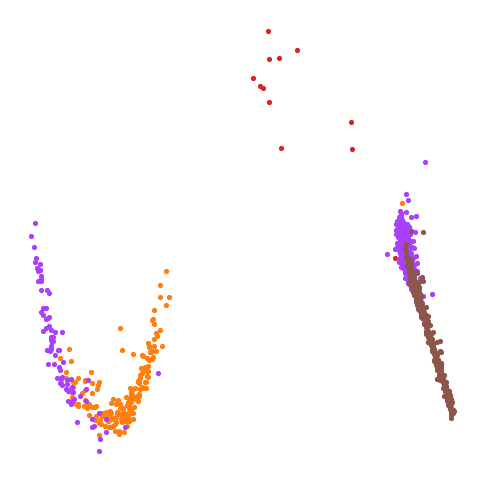

In [10]:
row = df.loc['COVID-ma;{}'.format(model), :]
df_res = get_res_obs(row)
df_res['sp'] = df_res['dataset_type'].map(
    {i: map_sp[row['sp_{}'.format(i)]] for i in 'ref,que'.split(',')})
display(df_res.head(2))
df_obs_que = pd.read_csv(row['dir'].joinpath('obs_que.csv'), index_col=0)
# tidyverse 将列名 _batch 转成了 X_batch,得调回来
if model == 'Seurat':
    df_obs_que = df_obs_que.rename(columns = {'X_batch':'_batch'})
df_res['_batch'] = ''
df_res['_batch'] = df_res['_batch'].mask(
    df_res['dataset_type'] == 'que',
    df_obs_que['_batch'])

adata_umap = sc.AnnData(obs=df_res)
adata_umap.obsm['X_umap'] = df_res.loc[:,
                                       'UMAP1,UMAP2'.split(',')].to_numpy()
print(','.join(np.unique(adata_umap.obs['true_label'].unique())))
cell_type_color_map = get_color_map(
    "AM_1,AM_2,AM_3,AM_4,IM_1,IM_2,IM_3,IM_4,macrophage".split(',')
)
print(','.join(cell_type_color_map.keys()))
sp_color_map = get_color_map(adata_umap.obs['sp'], offset=3)
show_color_map(sp_color_map)

# sp ref,que
save_file_name = '{};{};umap;sp;mh.{}'.format(
    item, row.name, fig_format)
ax = plot_umap(adata_umap,
               'sp',
               sp_color_map,
               size=5, marker='.',
               show_legend=show_legend,
               save_file_name=save_file_name,
               p_plot=p_plot_item
               )

# true_label ref
save_file_name = '{};{};umap;true_label;m.{}'.format(
    item, row.name, fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
          'true_label',
          cell_type_color_map,
          size=30,
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item
          )

# # true_label que
# save_file_name = '{};{};umap;true_label;ma.{}'.format(
#     item,row.name, fig_format)
# plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
#           'true_label',
#           cell_type_color_map,
#           size=30,
#           show_legend=show_legend,
#           save_file_name=save_file_name,
#           p_plot=p_plot_item
#          )
# pre_label que
save_file_name = '{};{};umap;pre_label;ma.{}'.format(
    item, row.name, fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label',
          cell_type_color_map,
          size=30,
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item
          )

[out][plot] legend;COVID-ma;cell_type.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;COVID-ma;cell_type.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;COVID-ma;cell_type.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;COVID-ma;sp.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;COVID-ma;sp.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;COVID-ma;sp.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb


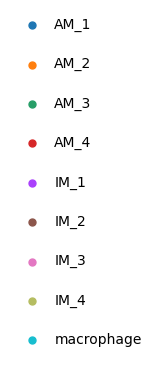

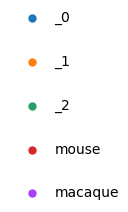

In [11]:
# [legend]
_ = 'COVID-ma'
ax = show_color_map(cell_type_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend;{};cell_type.png'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.svg'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.pdf'.format(_),p_plot=p_plot_item)

ax = show_color_map(sp_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend;{};sp.png'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};sp.svg'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};sp.pdf'.format(_),p_plot=p_plot_item)

## que sub macrophage

In [12]:
df_res['_batch'].value_counts()

_batch
              15720
infected_2      628
infected_1      625
healthy_1       377
Name: count, dtype: int64

In [13]:
df_plot = df_res.query("dataset_type == 'que'").copy()
df_plot = pd.merge(
    group_agg(df_plot,
              '_batch,pre_label'.split(','),
              {'pre_label': ['count']}),
    df_plot['_batch'].value_counts().to_frame('count').reset_index(),
    on='_batch'
).sort_values('_batch')
df_plot['ratio'] = df_plot.eval('pre_label_count/count')
_temp = df_plot.pivot(
    index='_batch',
    columns='pre_label',
    values='ratio')

df_plot = pd.DataFrame(
    0.0,
    columns=np.sort(
        df_res.query("dataset_type == 'ref'")['true_label'].unique()),
    index=df_res.query("dataset_type == 'que'")['_batch'].unique())
df_plot.update(_temp)
del _temp

df_plot = df_plot.sort_index(
    key=lambda s: s.map({'healthy_1': 0,
                         'infected_1': 1,
                         'infected_2': 2}))
healthy_predict = df_plot.loc['healthy_1', :].copy()
display(healthy_predict)
df_plot = df_plot.transpose()
display(df_plot)

AM_1    0.000000
AM_2    0.082228
AM_3    0.000000
AM_4    0.005305
IM_1    0.716180
IM_2    0.196286
IM_3    0.000000
IM_4    0.000000
Name: healthy_1, dtype: float64

,healthy_1,infected_1,infected_2
AM_1,0.000000,0.0000,0.000000
AM_2,0.082228,0.0880,0.144904
AM_3,0.000000,0.0000,0.000000
AM_4,0.005305,0.0144,0.003185
IM_1,0.716180,0.5776,0.673567
IM_2,0.196286,0.3200,0.178344
IM_3,0.000000,0.0000,0.000000
IM_4,0.000000,0.0000,0.000000


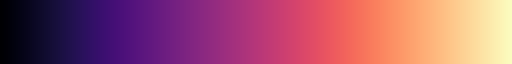

[out][plot] Mtb;COVID-ma;Seurat;bar;predict_ratio;ma.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb


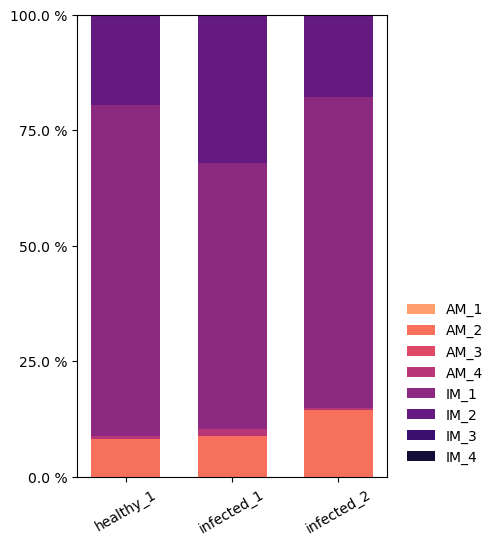

In [14]:
cm = mpl.colormaps['magma']
display(cm)

fig, ax = plt.subplots(1, 1, figsize=(4, 6))
bottom = np.repeat(0, df_plot.shape[1])
for (_i, _row), c in zip(df_plot.iterrows(), [
        cm(_) for _ in np.linspace(.1, .8, df_plot.index.size)][::-1]):
    ax.bar(np.arange(df_plot.columns.size), df_plot.loc[_i, :],
           width=0.65,
           color=c,
           bottom=bottom, label=_i)
    bottom = bottom + df_plot.loc[_i, :]
ax.legend()
ax.get_legend().set(
    loc='lower right',
    bbox_to_anchor=(1.35, 0),
    frame_on=False
)
ax.set_xticks(
    np.arange(df_plot.columns.size),
    df_plot.columns, rotation=30
)
ax.set_yticks(
    np.linspace(0, 1, 5),
    ['{:.1f} %'.format(_) for _ in 100 * np.linspace(0, 1, 5)]
    # ,rotation=30
)
savefig(
    fig,
    '{};{};bar;predict_ratio;ma.{}'.format(
        item, row.name, fig_format),
    p_plot=p_plot_item
)

## marker

,gn_ref,gn_que,gn_tpye,ref_exists,que_exists
15756,Top2a,TOP2A,ortholog_one2one,True,True
41827,Fcer1g,FCER1G,ortholog_one2one,True,True
46316,Cd63,CD63,ortholog_one2one,True,True
48283,Mki67,MKI67,ortholog_one2one,True,False
57930,Zeb2,ZEB2,ortholog_one2one,True,True


[out][plot] Mtb;COVID-ma;Seurat;marker;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;COVID-ma;Seurat;marker;ma.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb


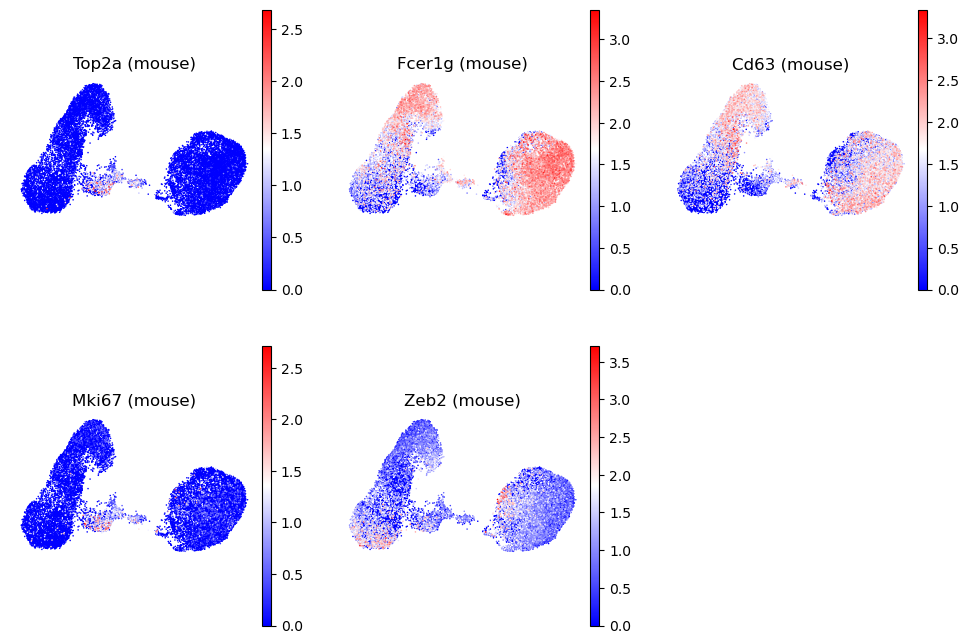

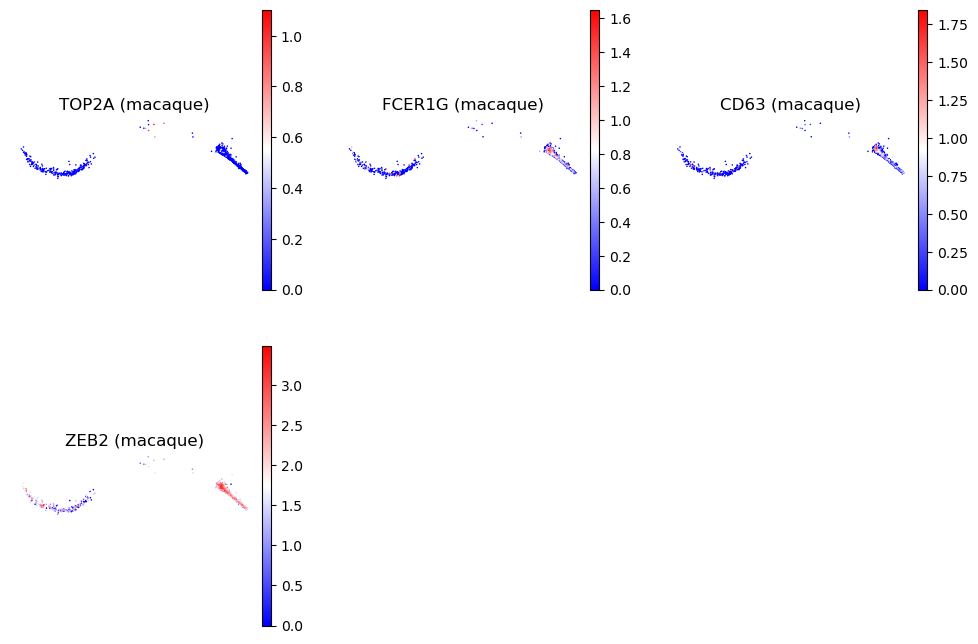

In [15]:
# load_normalized_adata
adata_ref = load_normalized_adata(
    find_path_from_para(
        df_para, row['name_ref']))
adata_que = load_normalized_adata(
    find_path_from_para(
        df_para, row['name_que']))
# load obsm['X_umap']
assert adata_que.obs.index.isin(
    df_res.query("dataset_type == 'que'").index).all()
adata_que = adata_que[df_res.query("dataset_type == 'que'").index, :]
adata_que.obs = adata_que.obs.loc[:, []].join(
    df_res.query("dataset_type == 'que'"))
adata_que.obsm['X_umap'] = df_res.query(
    "dataset_type == 'que'").loc[:, 'UMAP1,UMAP2'.split(',')].to_numpy()

assert adata_ref.obs.index.isin(
    df_res.query("dataset_type == 'ref'").index).all()
adata_ref = adata_ref[df_res.query("dataset_type == 'ref'").index, :]
adata_ref.obs = adata_ref.obs.loc[:, []].join(
    df_res.query("dataset_type == 'ref'"))
adata_ref.obsm['X_umap'] = df_res.query(
    "dataset_type == 'ref'").loc[:, 'UMAP1,UMAP2'.split(',')].to_numpy()

df_varmap = pd.read_csv(get_path_varmap(
    map_sp[row['sp_ref']], map_sp[row['sp_que']]))
df_varmap.columns = 'gn_ref,gn_que,gn_tpye'.split(',')
df_varmap = df_varmap.dropna().filter(
    regex='^gn_.+')

df_varmap_select = df_varmap[df_varmap['gn_ref'].str.match(
    '(Mki67)|(Top2a)|(Cd63)|(Fcer1g)|(Zeb2)', case=False)]
# filter IL6RA
df_varmap_select = df_varmap_select.query("gn_ref != 'IL6R'")

df_varmap_select = df_varmap_select.assign(
    **{
        'ref_exists': df_varmap_select['gn_ref'].apply(
            lambda x: x in adata_ref.var_names),
        'que_exists': df_varmap_select['gn_que'].apply(
            lambda x: x in adata_que.var_names),
    }
)
display(df_varmap_select)


nrows = 2
ncols = 3
# marker ref
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(
        4*ncols, 4*nrows),)
for ax, gene in zip_longest(np.ravel(axs), df_varmap_select.query(
        "ref_exists")['gn_ref'], fillvalue=None):
    ax.set_aspect('equal')
    if gene:
        sc.pl.umap(adata_ref, color=[gene],
                   # vmax=5,vmin=0,
                   ncols=2,
                   sort_order=True,
                   cmap='bwr',
                   size=5,
                   show=False,
                   colorbar_loc='right',
                   ax=ax,
                   frameon=False, title='{} (mouse)'.format(gene)
                   )
    else:
        fig.delaxes(ax)
savefig(fig, '{};{};marker;m.{}'.format(
    item, row.name, fig_format), p_plot=p_plot_item)
# marker que
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(
        4*ncols, 4*nrows),)
for ax, gene in zip_longest(np.ravel(axs), df_varmap_select.query(
        "que_exists")['gn_que'], fillvalue=None):
    ax.set_aspect('equal')
    if gene:
        sc.pl.umap(adata_que, color=[gene],
                   # vmax=5,vmin=0,
                   ncols=2,
                   sort_order=True,
                   cmap='bwr',
                   size=5,
                   show=False,
                   colorbar_loc='right',
                   ax=ax,
                   frameon=False, title='{} (macaque)'.format(gene)
                   )
    else:
        fig.delaxes(ax)
savefig(fig, '{};{};marker;ma.{}'.format(
    item, row.name, fig_format), p_plot=p_plot_item)

# Mtb-ma

## umap

,UMAP1,UMAP2,cell_type,dataset,is_right,max_prob,pre_label,true_label,dataset_type,sp
cell_name,,,,,,,,,,
Mtb_mtb;AAACCCACAGGCTATT_1,7.584464,0.349068,IM_3,Mtb_m,NaN,NaN,NaN,IM_3,ref,mouse
Mtb_mtb;AAACCCAGTCCTACGG_1,3.275475,0.605346,IM_1,Mtb_m,NaN,NaN,NaN,IM_1,ref,mouse


AM_1,AM_2,AM_3,AM_4,IM_1,IM_2,IM_3,IM_4,macrophage
AM_1,AM_2,AM_3,AM_4,IM_1,IM_2,IM_3,IM_4,macrophage
[out][plot] Mtb;Mtb-ma;Seurat;umap;sp;mh.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;umap;true_label;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;umap;pre_label;ma.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb


<Axes: >

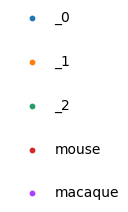

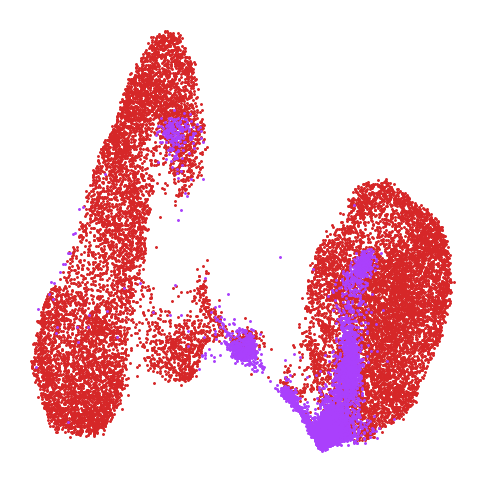

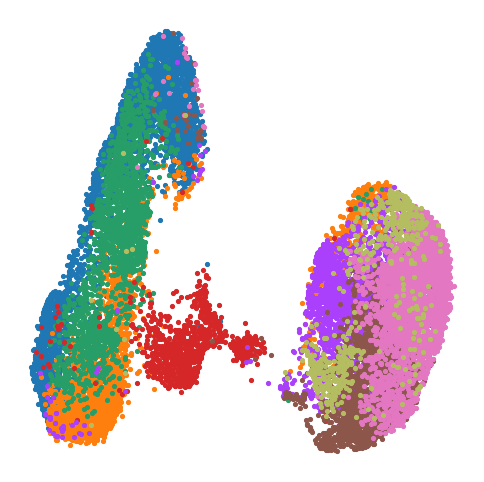

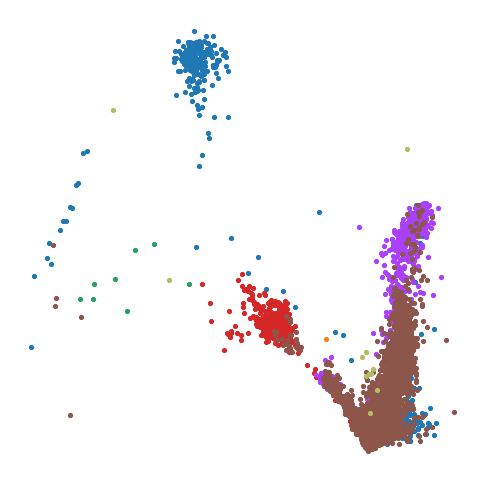

In [16]:
row = df.loc['Mtb-ma;{}'.format(model), :]
df_res = get_res_obs(row)
df_res['sp'] = df_res['dataset_type'].map(
    {i: map_sp[row['sp_{}'.format(i)]] for i in 'ref,que'.split(',')})
display(df_res.head(2))

df_obs_que = pd.read_csv(row['dir'].joinpath('obs_que.csv'), index_col=0)
# tidyverse 将列名 _batch 转成了 X_batch,得调回来
if model == 'Seurat':
    df_obs_que = df_obs_que.rename(columns = {'X_batch':'_batch'})
df_res = df_res.join(
    df_obs_que.loc[
        :, '_batch'.split(',')])

adata_umap = sc.AnnData(obs=df_res)
adata_umap.obsm['X_umap'] = df_res.loc[:,
                                       'UMAP1,UMAP2'.split(',')].to_numpy()
print(','.join(np.unique(adata_umap.obs['true_label'].unique())))
cell_type_color_map = get_color_map(
    "AM_1,AM_2,AM_3,AM_4,IM_1,IM_2,IM_3,IM_4,macrophage".split(',')
)
print(','.join(cell_type_color_map.keys()))
sp_color_map = get_color_map(adata_umap.obs['sp'], offset=3)
show_color_map(sp_color_map)

# sp ref,que
save_file_name = '{};{};umap;sp;mh.{}'.format(
    item, row.name, fig_format)
ax = plot_umap(adata_umap,
               'sp',
               sp_color_map,
               size=5, marker='.',
               show_legend=show_legend,
               save_file_name=save_file_name,
               p_plot=p_plot_item
               )

# true_label ref
save_file_name = '{};{};umap;true_label;m.{}'.format(
    item, row.name, fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
          'true_label',
          cell_type_color_map,
          size=30,
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item
          )

# # true_label que
# save_file_name = '{};{};umap;true_label;ma.{}'.format(
#     item,row.name, fig_format)
# plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
#           'true_label',
#           cell_type_color_map,
#           size=30,
#           show_legend=show_legend,
#           save_file_name=save_file_name,
#           p_plot=p_plot_item
#          )
# pre_label que
save_file_name = '{};{};umap;pre_label;ma.{}'.format(
    item, row.name, fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label',
          cell_type_color_map,
          size=30,
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item
          )

[out][plot] legend;Mtb-ma;cell_type.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;Mtb-ma;cell_type.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;Mtb-ma;cell_type.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;Mtb-ma;sp.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;Mtb-ma;sp.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] legend;Mtb-ma;sp.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb


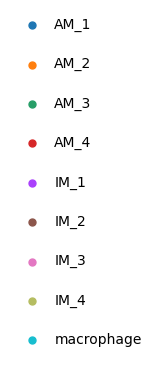

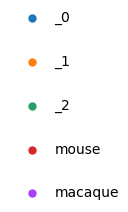

In [17]:
_ = 'Mtb-ma'
ax = show_color_map(cell_type_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend;{};cell_type.png'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.svg'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.pdf'.format(_),p_plot=p_plot_item)

ax = show_color_map(sp_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend;{};sp.png'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};sp.svg'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};sp.pdf'.format(_),p_plot=p_plot_item)

## que sub macrophage

In [18]:
df_plot = df_res.query("dataset_type == 'que'").copy()
df_plot = pd.merge(
    group_agg(df_plot,
              '_batch,pre_label'.split(','),
              {'pre_label': ['count']}),
    df_plot['_batch'].value_counts().to_frame('count').reset_index(),
    on='_batch'
).sort_values('_batch')
df_plot['ratio'] = df_plot.eval('pre_label_count/count')

_temp = df_plot.pivot(
    index='_batch',
    columns='pre_label',
    values='ratio')

df_plot = pd.DataFrame(
    0.0,
    columns=np.sort(
        df_res.query("dataset_type == 'ref'")['true_label'].unique()),
    index=df_res.query("dataset_type == 'que'")['_batch'].unique())
df_plot.update(_temp)
del _temp

# add healthy
df_plot = df_plot.transpose().join(healthy_predict).transpose()

# '_batch,treatment,tb_infection_dose,batch'.split(',')
_temp = df_plot.index.str.extract(
    "^(?P<treatment>[^_]+)_(?P<tb_infection_dose>[^_]+)_?(?P<batch>[^_]+)?$")
_temp.index = df_plot.index
df_plot = _temp.join(df_plot)
df_plot = df_plot.sort_values('treatment,tb_infection_dose'.split(
    ','), key=lambda s: s.map(lambda k:{'healthy': 0, 'IgG': 1, 'CD8a': 2, 'CD8b': 3}.setdefault(k,k)))
df_plot.head(2)

,treatment,tb_infection_dose,batch,AM_1,AM_2,AM_3,AM_4,IM_1,IM_2,IM_3,IM_4
healthy_1,healthy,1,NaN,0.000000,0.082228,0.0,0.005305,0.716180,0.196286,0.0,0.0
IgG_18_8,IgG,18,8,0.008982,0.000000,0.0,0.008982,0.062874,0.919162,0.0,0.0


tag
IgG_23       8
CD8a_23      8
CD8a_19      5
CD8a_18      4
IgG_18       4
CD8b_19      4
CD8b_18      4
CD8b_23      4
healthy_1    1
Name: count, dtype: int64

[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment_dose;AM_1.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment_dose;AM_2.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment_dose;AM_3.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment_dose;AM_4.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment_dose;IM_1.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment_dose;IM_2.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment_dose;IM_3.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;

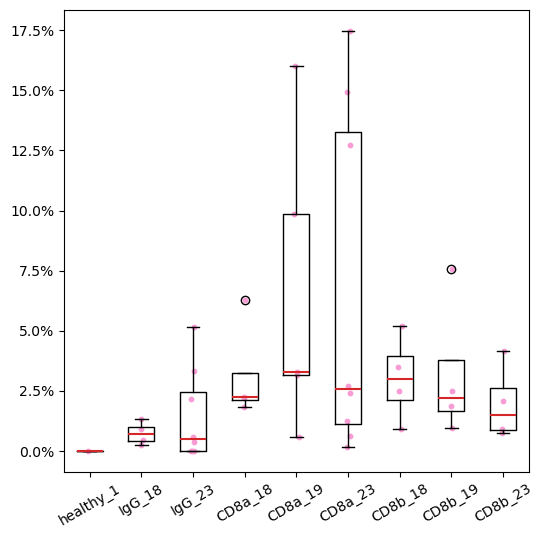

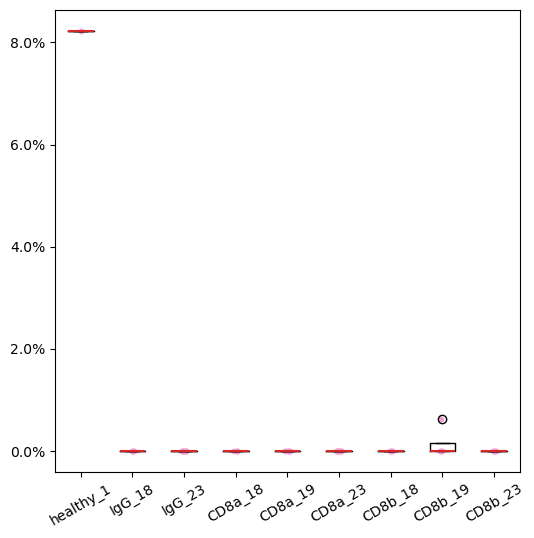

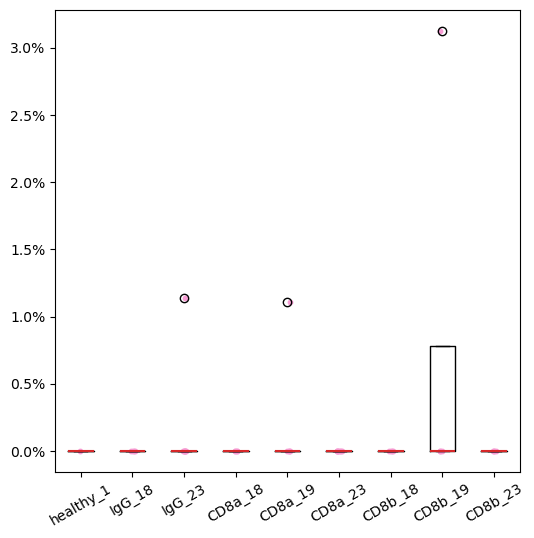

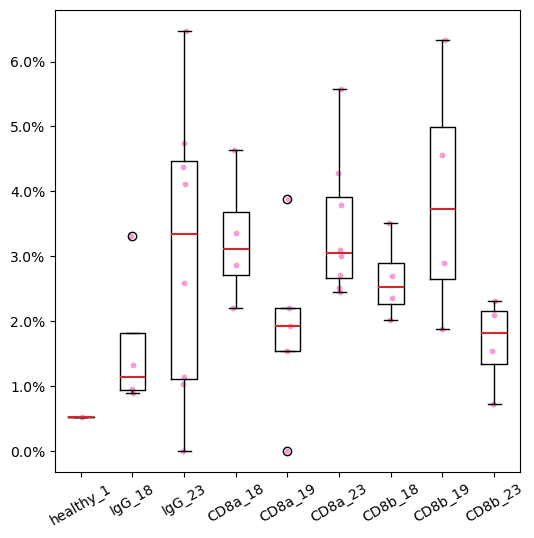

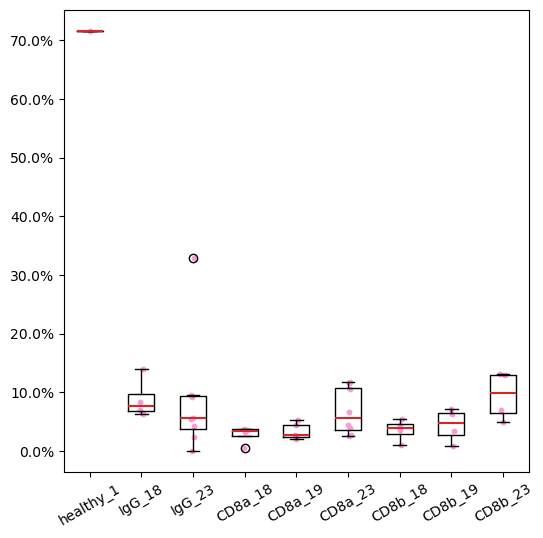

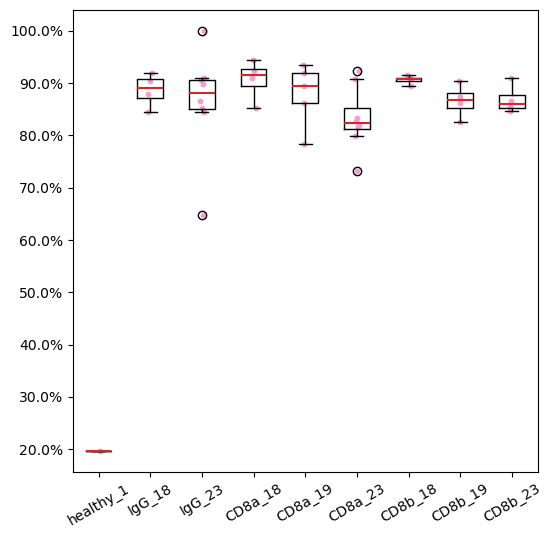

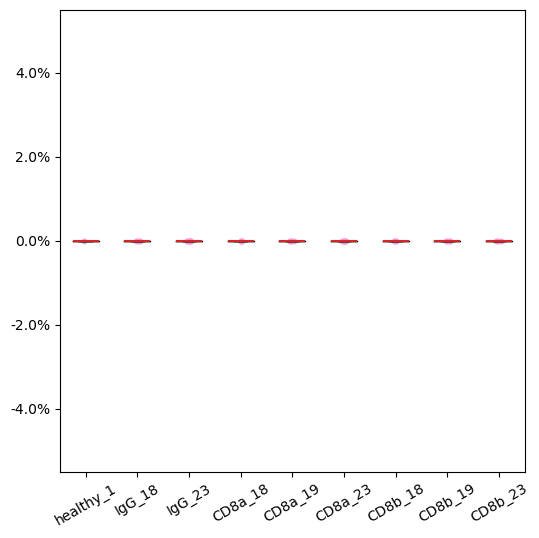

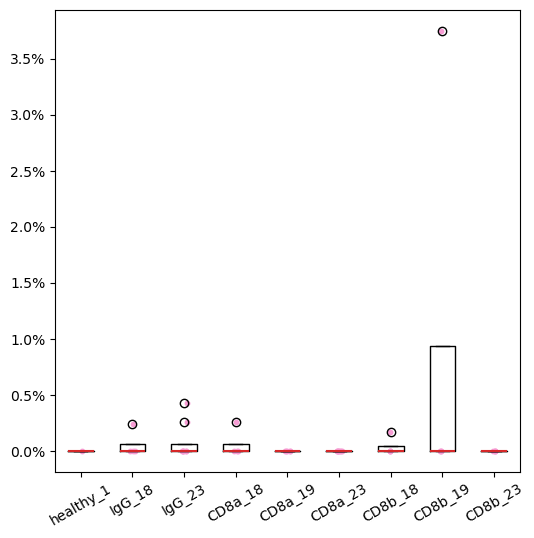

In [19]:
df_plot['tag'] = df_plot.apply(
    lambda _: '{treatment}_{tb_infection_dose}'.format(
        **_), axis=1)
display(df_plot['tag'].value_counts())
for predict_cell_tyle in df_plot.filter(regex='[AI]M_\d').columns:
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.boxplot(
        [df_plot.query("tag == '{}'".format(tag))[predict_cell_tyle]
         for tag in df_plot['tag'].unique()],
        labels=df_plot['tag'].unique(),
        medianprops={"color": get_color(3), "linewidth": 1.5}
    )
    ax.set_xticklabels(
        df_plot['tag'].unique(), fontdict={'rotation': 30}
    )
    ax.set_yticks(ax.get_yticks(), ['{:.1f}%'.format(_)
                  for _ in ax.get_yticks() * 100])
    
    # scatter
    _df = df_plot.loc[:, []].copy()
    _df['x'] = df_plot['tag'].map(
    {
        _.get_text():
        _.get_position()[0]
        for _ in ax.get_xticklabels()}
        
    ) + 0.1*(0.5-rng.random(df_plot.index.size))
    _df['y'] = df_plot[predict_cell_tyle]
    _df
    
    ax.scatter(_df['x'], _df['y'],s=10,c=get_color(23))
    savefig(fig,
    '{};{};box;predict_ratio;treatment_dose;{}.{}'.format(
            item, row.name,predict_cell_tyle, fig_format),p_plot=p_plot_item)

tag
CD8a       17
IgG        12
CD8b       12
healthy     1
Name: count, dtype: int64

[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment;AM_1.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment;AM_2.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment;AM_3.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment;AM_4.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment;IM_1.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment;IM_2.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment;IM_3.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;box;predict_ratio;treatment;IM_4.png 
	

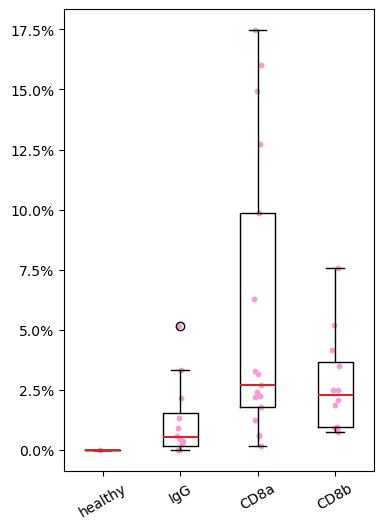

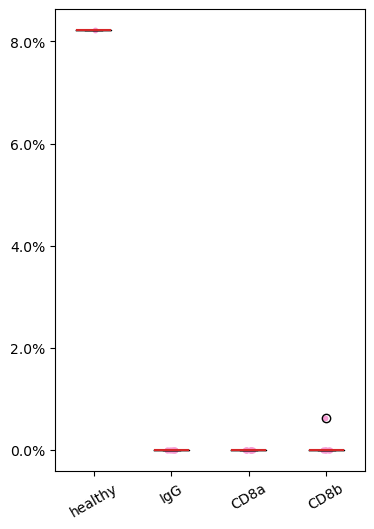

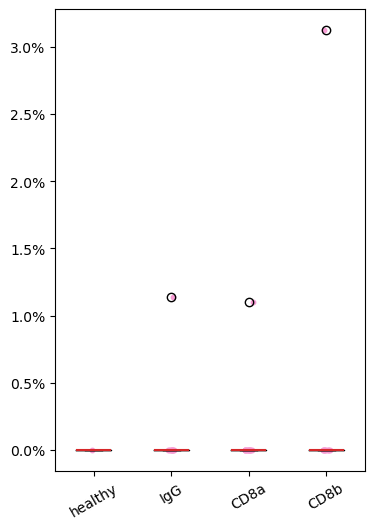

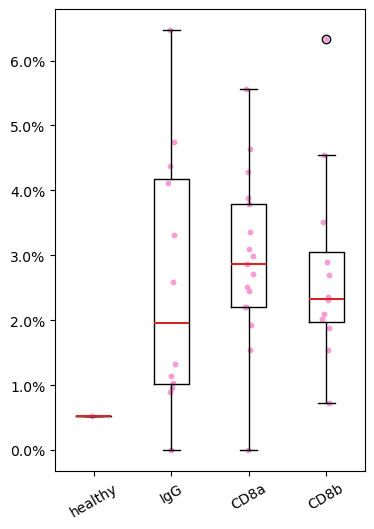

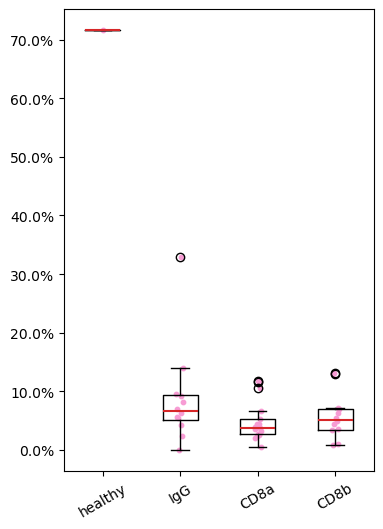

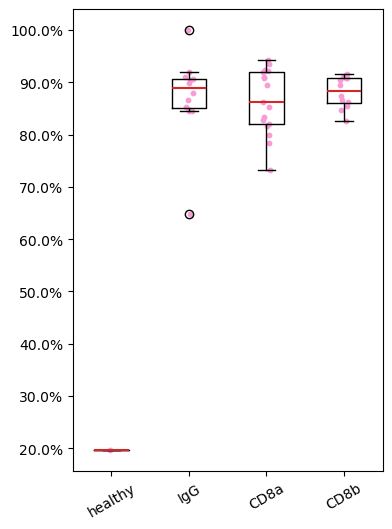

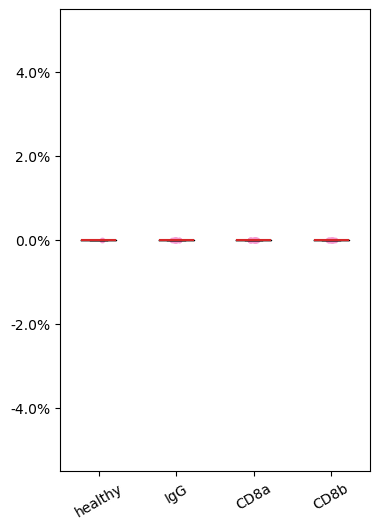

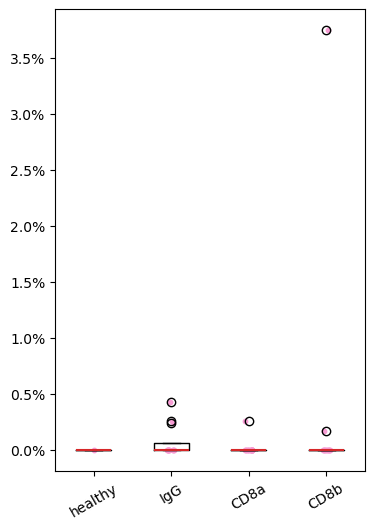

In [20]:
df_plot['tag'] = df_plot.apply(
    lambda _: '{treatment}'.format(
        **_), axis=1)
display(df_plot['tag'].value_counts())
for predict_cell_tyle in df_plot.filter(regex='[AI]M_\d').columns:
    fig, ax = plt.subplots(1, 1, figsize=(4, 6))
    ax.boxplot(
        [df_plot.query("tag == '{}'".format(tag))[predict_cell_tyle]
         for tag in df_plot['tag'].unique()],
        labels=df_plot['tag'].unique(),
    medianprops={"color": get_color(3), "linewidth": 1.5}
    )
    ax.set_xticklabels(
        df_plot['tag'].unique(), fontdict={'rotation': 30}
    )
    ax.set_yticks(ax.get_yticks(), ['{:.1f}%'.format(_)
                  for _ in ax.get_yticks() * 100])
    
    _df = df_plot.loc[:, []].copy()
    _df['x'] = df_plot['tag'].map(
    {
        _.get_text():
        _.get_position()[0]
        for _ in ax.get_xticklabels()}
        
    ) + 0.1*(0.5-rng.random(df_plot.index.size))
    _df['y'] = df_plot[predict_cell_tyle]
    _df
    
    ax.scatter(_df['x'], _df['y'],s=10,c=get_color(23))
    savefig(fig,
    '{};{};box;predict_ratio;treatment;{}.{}'.format(
            item, row.name, predict_cell_tyle,fig_format),p_plot=p_plot_item)
pass

## marker

,gn_ref,gn_que,gn_tpye,ref_exists,que_exists
15756,Top2a,TOP2A,ortholog_one2one,True,True
41827,Fcer1g,FCER1G,ortholog_one2one,True,True
46316,Cd63,CD63,ortholog_one2one,True,True
48283,Mki67,MKI67,ortholog_one2one,True,True
57930,Zeb2,ZEB2,ortholog_one2one,True,True


[out][plot] Mtb;Mtb-ma;Seurat;marker;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb
[out][plot] Mtb;Mtb-ma;Seurat;marker;ma.png 
	in /public/workspace/licanchengup/download/res_publish/plot/Mtb


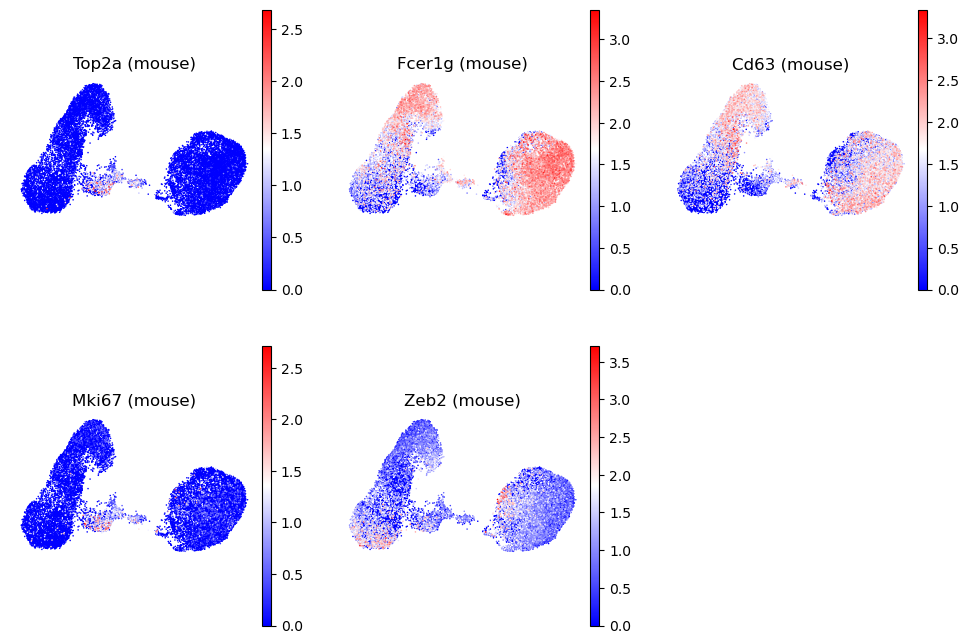

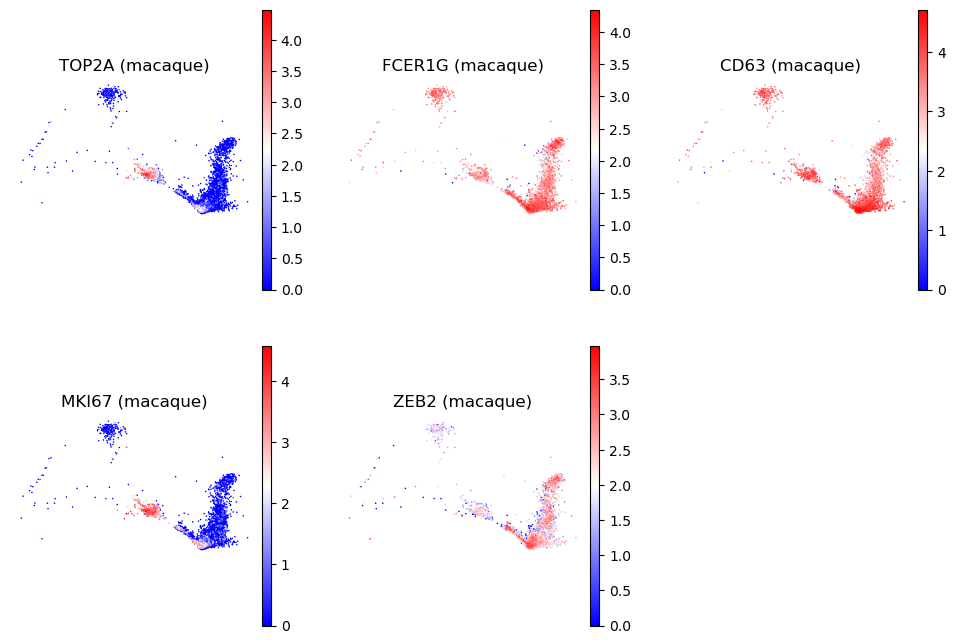

In [21]:
# load_normalized_adata
adata_ref = load_normalized_adata(
    find_path_from_para(
        df_para, row['name_ref']))
adata_que = load_normalized_adata(
    find_path_from_para(
        df_para, row['name_que']))
# load obsm['X_umap']
assert adata_que.obs.index.isin(
    df_res.query("dataset_type == 'que'").index).all()
adata_que = adata_que[df_res.query("dataset_type == 'que'").index, :]
adata_que.obs = adata_que.obs.loc[:, []].join(
    df_res.query("dataset_type == 'que'"))
adata_que.obsm['X_umap'] = df_res.query(
    "dataset_type == 'que'").loc[:, 'UMAP1,UMAP2'.split(',')].to_numpy()

assert adata_ref.obs.index.isin(
    df_res.query("dataset_type == 'ref'").index).all()
adata_ref = adata_ref[df_res.query("dataset_type == 'ref'").index, :]
adata_ref.obs = adata_ref.obs.loc[:, []].join(
    df_res.query("dataset_type == 'ref'"))
adata_ref.obsm['X_umap'] = df_res.query(
    "dataset_type == 'ref'").loc[:, 'UMAP1,UMAP2'.split(',')].to_numpy()

df_varmap = pd.read_csv(get_path_varmap(
    map_sp[row['sp_ref']], map_sp[row['sp_que']]))
df_varmap.columns = 'gn_ref,gn_que,gn_tpye'.split(',')
df_varmap = df_varmap.dropna().filter(
    regex='^gn_.+')

df_varmap_select = df_varmap[df_varmap['gn_ref'].str.match(
    '(Mki67)|(Top2a)|(Cd63)|(Fcer1g)|(Zeb2)', case=False)]
# filter IL6RA
df_varmap_select = df_varmap_select.query("gn_ref != 'IL6R'")

df_varmap_select = df_varmap_select.assign(
    **{
        'ref_exists': df_varmap_select['gn_ref'].apply(
            lambda x: x in adata_ref.var_names),
        'que_exists': df_varmap_select['gn_que'].apply(
            lambda x: x in adata_que.var_names),
    }
)
display(df_varmap_select)


nrows = 2
ncols = 3
# marker ref
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(
        4*ncols, 4*nrows),)
for ax, gene in zip_longest(np.ravel(axs), df_varmap_select.query(
        "ref_exists")['gn_ref'], fillvalue=None):
    ax.set_aspect('equal')
    if gene:
        sc.pl.umap(adata_ref, color=[gene],
                   # vmax=5,vmin=0,
                   ncols=2,
                   sort_order=True,
                   cmap='bwr',
                   size=5,
                   show=False,
                   colorbar_loc='right',
                   ax=ax,
                   frameon=False, title='{} (mouse)'.format(gene)
                   )
    else:
        fig.delaxes(ax)
savefig(fig, '{};{};marker;m.{}'.format(
    item, row.name, fig_format), p_plot=p_plot_item)
# marker que
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(
        4*ncols, 4*nrows),)
for ax, gene in zip_longest(np.ravel(axs), df_varmap_select.query(
        "que_exists")['gn_que'], fillvalue=None):
    ax.set_aspect('equal')
    if gene:
        sc.pl.umap(adata_que, color=[gene],
                   # vmax=5,vmin=0,
                   ncols=2,
                   sort_order=True,
                   cmap='bwr',
                   size=5,
                   show=False,
                   colorbar_loc='right',
                   ax=ax,
                   frameon=False, title='{} (macaque)'.format(gene)
                   )
    else:
        fig.delaxes(ax)
savefig(fig, '{};{};marker;ma.{}'.format(
    item, row.name, fig_format), p_plot=p_plot_item)

In [23]:
print("\n[finish]\n".center(100, "-"))

---------------------------------------------
[finish]
---------------------------------------------
